In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [8]:
anonymized = False

In [9]:
min_time = 10/60 # 10 secs
max_time = 30
def time_query(var,min=min_time,max=max_time):
    return f"{min} < "+var+f" <{max}"

In [10]:
weeks = [f"Quiz #{i}" for i in range (1, 12)]

In [11]:
df = pd.read_json('merged_logs.jsonl', lines=True, convert_dates=['_creationTime'])
if anonymized :
    df = df[df['valid']]
df = df.query("week in @weeks")
df = df.query(time_query('timeSpent_quiz'))
df = df.query(time_query('timeSpent_message'))
df = df.drop_duplicates(subset=['_id'])
df

,_creationTime,_id,attemptId,exerciseId,type,userId,variant,details,systemMessageId,userMessageId,exerciseName,controlGroup,userGroup,week,timeSpent_quiz,n_mess,timeSpent_message,userData,userGrades,valid
0,2024-05-11 15:56:52.688,k570005nhp144860betwtwy7v56rx64m,j571kc5p8ah7yvj1xhng7nzpgs6rxy2m,k179wpzex0za69rx2wyv02e9hd6rj4fb,attemptStarted,js71tk2nax2wvs97m3vgc5erp16mds09,reading,None,None,None,Kruskal's algorithm,A,A,Quiz #9,1.769433,NaN,1.769433,"{'gender': 'Female', 'section': 'IN', 'semeste...","{'coding': 65.0, 'midterm': 98, 'final': 86, '...",True
1,2024-04-16 08:00:01.116,k57000a4rv5wgy13d63pqyt51s6qb2vv,j57adjsev6qjazakv9p4ad7qwh6qany3,k1710bmgh2mwgaqv7sjkmmfh1x6pveqf,quizSubmission,js7ese808vctnr15sy1te2pvx96mndmx,explain,"{'answers': [2.0, 0.0, 2.0], 'correctness': 1....",None,None,Optimal Binary Search Trees,A,B,Quiz #5,18.036219,11.0,18.036219,"{'gender': 'Male', 'section': 'SC', 'semester'...","{'coding': 100.0, 'midterm': 63, 'final': 72, ...",True
2,2024-05-20 16:28:14.092,k57000d308fpr45yqrprf6wrs56see5h,j572qtbd19x89mraje17mmj30x6sen0s,k176kkt806khrpxnctb9hczm316rtsrq,quizSubmission,js78b7hq6r6pk2c0mm9d2he91s6mjb8v,reading,"{'answers': [2.0, 3.0, 0.0], 'correctness': 1....",None,None,Dijkstra,A,A,Quiz #10,12.279168,NaN,12.279168,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 100.0, 'midterm': 55, 'final': 35, ...",True
4,2024-03-13 16:35:30.072,k57000mdpmrfm67q4eymvsbqns6n6ezf,j571e3e401tqj2mag6mjgrcynx6n7t96,k1715d99fyvzt35jfm2638g3nd6n35z3,exerciseCompleted,js7534h7gnm8pmyem0n6ttdb816mb94w,explain,None,None,None,Heap Sort,A,B,Quiz #3,9.432901,9.0,9.432901,"{'gender': 'Male', 'section': 'SC', 'semester'...","{'coding': 100.0, 'midterm': 87, 'final': 68, ...",True
7,2024-05-22 09:03:11.012,k57000tdp2bnpcsszr3m7nyr316sjeg0,j577f039a412vmwetm03yv6np16sj2t3,k17416m11n2qpqy5sr2zz6782s6s2y2n,attemptStarted,js770gtc71hjt59gn0n6xmx9an6mb4tq,explain,None,None,None,Quicksort,B,A,Quiz #11,1.764233,31.0,1.764233,"{'gender': 'Male', 'section': 'MA', 'semester'...","{'coding': 100.0, 'midterm': 78, 'final': 92, ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152607,2024-04-28 15:58:08.244,k57fzz4xh4a5j78rbrhpctvyxs6r2dh9,j574ym30w3hmatzk704wf785fx6r2ett,k172p4g9eanfgsgtkjg0sn49916qgwh4,answerGenerated,js7f8p4456h8p3f9am33n8p3f56mc1k2,explain,None,jd7btft8ad0g2v5j93jkz1qyw16r2xgb,jd709bqe9abqhft932cd7rymyn6r3qwj,Topological Sorting,B,A,Quiz #7,3.718620,17.0,3.718620,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 100.0, 'midterm': 58, 'final': 35, ...",True
152608,2024-05-27 08:00:30.354,k57fzz51fb94zwwwyr2dkqe0dn6swxcd,j57e3pn2xry7d6rry56zgrskmx6sxvab,k1766dkmvc795dxzf5esj0zdc56s713p,feedbackGiven,js7518qe74yw1zy5hyqh17h8ps6mc6vs,explain,None,jd7csjm3qh9xveza5b558vnvdd6swmgm,None,Hash Tables,A,B,Quiz #11,8.909992,9.0,8.909992,None,None,False
152609,2024-04-04 09:59:25.539,k57fzzawztspx74s56dd8v9g7h6pkea6,j57cq176xgq49ebe4hq4ec4bb96pjfc1,k17asvnfeyp3q949hdkwjq2and6p2x6e,messageSent,js7ejegwwy13npt4t5xmxfaze16mf7wj,explain,None,jd765cr60qe2ygzfqsgq9950996pj5fm,jd77rttn3djr1548bzs6jp24hs6pkmyv,Matrix-Chain Multiplication,A,B,Quiz #4,6.870883,13.0,6.870883,"{'gender': 'Male', 'section': 'SC', 'semester'...","{'coding': 100.0, 'midterm': 60, 'final': 40, ...",True
152611,2024-05-06 22:05:16.395,k57fzzdgj1jvxwbbb443hfkej96rkktd,j57ck5p09yecbjpse269svw8eh6rkapf,k1768n9arfqk6vpqtsaxgs3m156qx8mp,messageSent,js77jjffzjf9pskspa6hh9sknh6ma65a,explain,None,jd764p5pff8zfxjf67f3rb2rgn6rj0xv,jd7920e1qrchh4fj403hjw9xj16rkyqt,Edge disjoint paths via max flow,A,B,Quiz #8,24.978101,25.0,24.978101,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 50.0, 'midterm': 49, 'final': 58, '...",True


# Attempts Analysis

week
Quiz #1     1671
Quiz #2     2714
Quiz #3     2788
Quiz #4     2112
Quiz #5     2412
Quiz #6     2656
Quiz #7     1890
Quiz #8     2104
Quiz #9     1826
Quiz #10    2014
Quiz #11    2479
Name: count, dtype: int64


,_creationTime,_id,attemptId,exerciseId,type,userId,variant,details,systemMessageId,userMessageId,...,controlGroup,userGroup,week,timeSpent_quiz,n_mess,timeSpent_message,userData,userGrades,valid,num_attempts
25137,2024-03-02 04:07:16.507,k572mmzt5dhzkg0v1w1dtaxjf96mh6nn,j578n1xyxee6t1zzadw2rktbv16mh9m1,k17dh8h1cdvfn45j3527z3w2d96m8zk6,quizSubmission,js7apc4p5kbrgf06h254dd8rd96mghpq,explain,"{'answers': [0.0, 0.0, 0.0], 'correctness': 0....",None,None,...,B,A,Quiz #1,7.77682,9.0,7.77682,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 100.0, 'midterm': 76, 'final': 42, ...",True,76.0
42097,2024-03-02 04:08:15.767,k574ckfepmfs955zsag9cp20yh6mgh01,j578n1xyxee6t1zzadw2rktbv16mh9m1,k17dh8h1cdvfn45j3527z3w2d96m8zk6,quizSubmission,js7apc4p5kbrgf06h254dd8rd96mghpq,explain,"{'answers': [0.0, 0.0, 0.0], 'correctness': 0....",None,None,...,B,A,Quiz #1,7.77682,9.0,7.77682,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 100.0, 'midterm': 76, 'final': 42, ...",True,76.0
90969,2024-03-02 04:08:20.768,k579fzkha1sctnr779yz3teck56mgscq,j578n1xyxee6t1zzadw2rktbv16mh9m1,k17dh8h1cdvfn45j3527z3w2d96m8zk6,quizSubmission,js7apc4p5kbrgf06h254dd8rd96mghpq,explain,"{'answers': [0.0, 0.0, 0.0], 'correctness': 0....",None,None,...,B,A,Quiz #1,7.77682,9.0,7.77682,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 100.0, 'midterm': 76, 'final': 42, ...",True,76.0
150284,2024-03-02 04:08:23.358,k57fr1qgjqfkmes6hbegd6m27n6mggvk,j578n1xyxee6t1zzadw2rktbv16mh9m1,k17dh8h1cdvfn45j3527z3w2d96m8zk6,quizSubmission,js7apc4p5kbrgf06h254dd8rd96mghpq,explain,"{'answers': [0.0, 0.0, 0.0], 'correctness': 0....",None,None,...,B,A,Quiz #1,7.77682,9.0,7.77682,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 100.0, 'midterm': 76, 'final': 42, ...",True,76.0
39118,2024-03-02 04:08:23.711,k5742yxt0bxkjnbv7aj42m0vmx6mgafw,j578n1xyxee6t1zzadw2rktbv16mh9m1,k17dh8h1cdvfn45j3527z3w2d96m8zk6,quizSubmission,js7apc4p5kbrgf06h254dd8rd96mghpq,explain,"{'answers': [0.0, 0.0, 0.0], 'correctness': 0....",None,None,...,B,A,Quiz #1,7.77682,9.0,7.77682,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 100.0, 'midterm': 76, 'final': 42, ...",True,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23433,2024-03-02 04:12:16.595,k572ewh46ahsn76aqarmexza516mgjda,j578n1xyxee6t1zzadw2rktbv16mh9m1,k17dh8h1cdvfn45j3527z3w2d96m8zk6,quizSubmission,js7apc4p5kbrgf06h254dd8rd96mghpq,explain,"{'answers': [0.0, 2.0, 0.0], 'correctness': 0....",None,None,...,B,A,Quiz #1,7.77682,9.0,7.77682,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 100.0, 'midterm': 76, 'final': 42, ...",True,76.0
122887,2024-03-02 04:12:54.268,k57cw4gqxwtkcysxb6yspyyr696mheyr,j578n1xyxee6t1zzadw2rktbv16mh9m1,k17dh8h1cdvfn45j3527z3w2d96m8zk6,quizSubmission,js7apc4p5kbrgf06h254dd8rd96mghpq,explain,"{'answers': [0.0, 0.0, 0.0], 'correctness': 0....",None,None,...,B,A,Quiz #1,7.77682,9.0,7.77682,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 100.0, 'midterm': 76, 'final': 42, ...",True,76.0
70023,2024-03-02 04:13:20.638,k5779pkwv9k6xwjyp549cjej656mg7t2,j578n1xyxee6t1zzadw2rktbv16mh9m1,k17dh8h1cdvfn45j3527z3w2d96m8zk6,quizSubmission,js7apc4p5kbrgf06h254dd8rd96mghpq,explain,"{'answers': [0.0, 3.0, 0.0], 'correctness': 0....",None,None,...,B,A,Quiz #1,7.77682,9.0,7.77682,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 100.0, 'midterm': 76, 'final': 42, ...",True,76.0
59468,2024-03-02 04:13:55.853,k5766fzwr77jrdpq3e518a0an96mgy4f,j578n1xyxee6t1zzadw2rktbv16mh9m1,k17dh8h1cdvfn45j3527z3w2d96m8zk6,quizSubmission,js7apc4p5kbrgf06h254dd8rd96mghpq,explain,"{'answers': [0.0, 2.0, 0.0], 'correctness': 0....",None,None,...,B,A,Quiz #1,7.77682,9.0,7.77682,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 100.0, 'midterm': 76, 'final': 42, ...",True,76.0


FileNotFoundError: [Errno 2] No such file or directory: 'figures/attempts/attemptStarted.png'

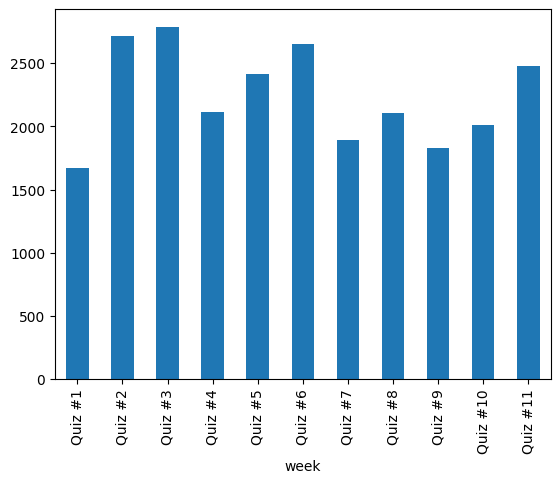

In [12]:
print(df.query("type == 'quizSubmission'")["week"].value_counts()[weeks])
df.query("type == 'quizSubmission'")["week"].value_counts()[weeks].plot(kind='bar')
c = df.query("type == 'quizSubmission'").groupby(["userId","exerciseId"]).transform('size')
df["num_attempts"] = df.query("type == 'quizSubmission'").groupby(["userId","exerciseId"]).transform('count')["type"]
display(df.query("num_attempts ==76").sort_values("_creationTime"))
plt.savefig('figures/attempts/attemptStarted.png')
plt.show()
df


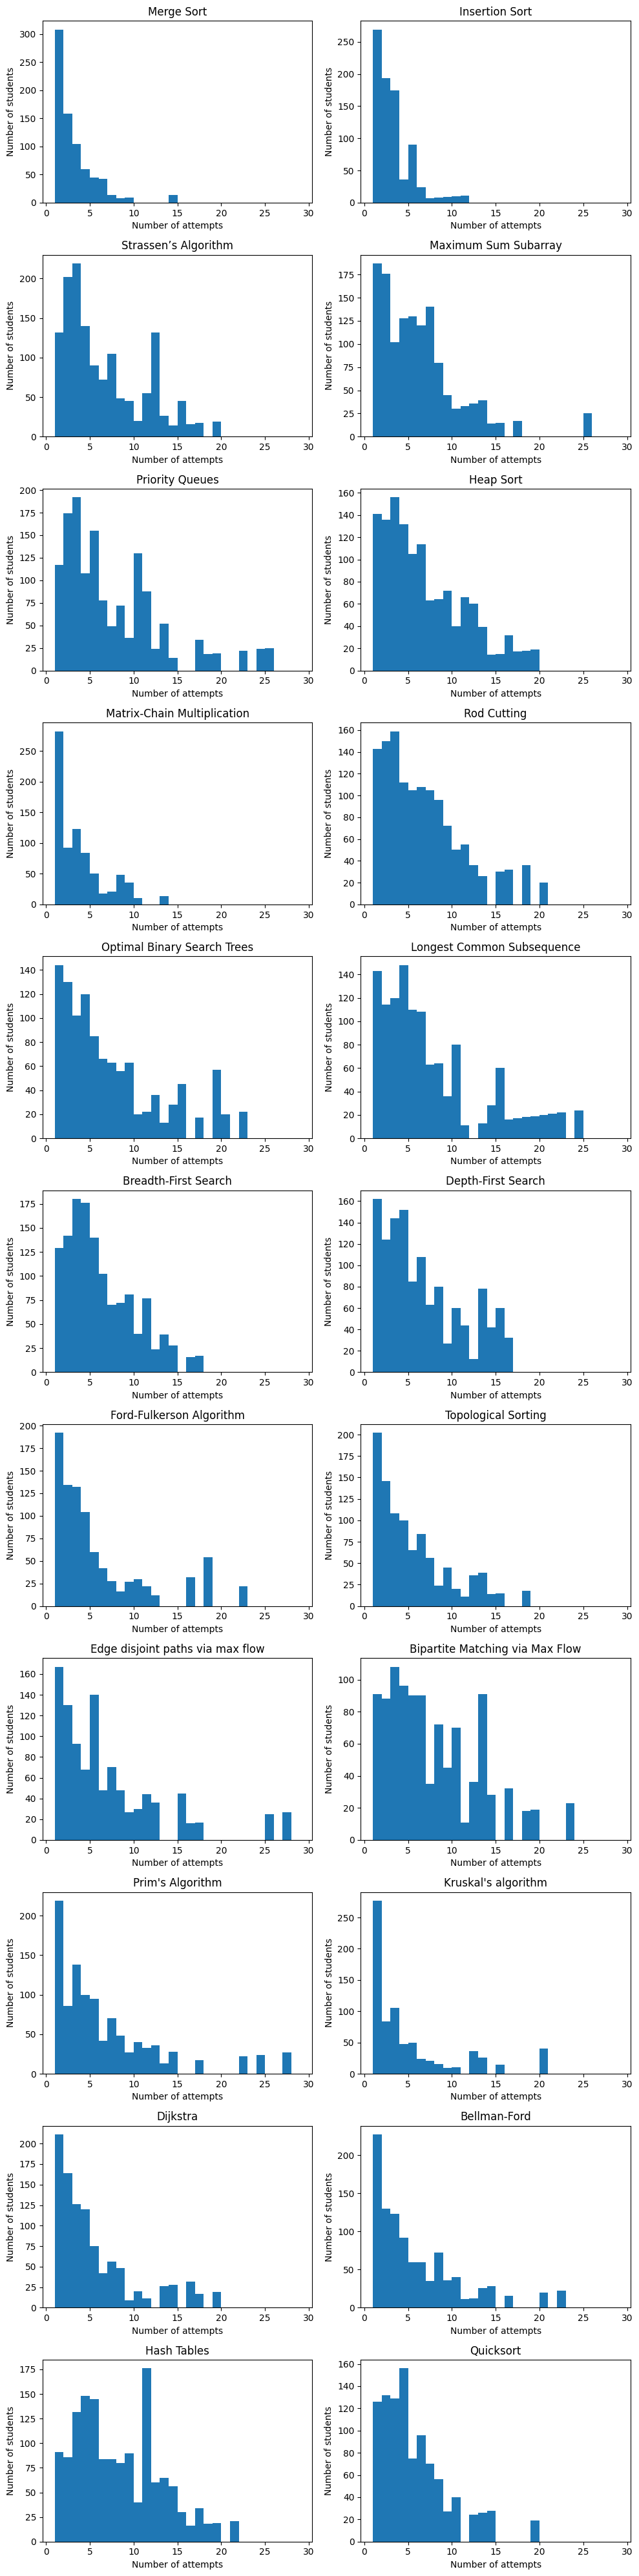

In [274]:
fig, ax = plt.subplots(11, 2, figsize=(10, 40))
bins = np.arange(1, 30,1)
for i,week in enumerate(weeks):
    attempts = df.query("type == 'quizSubmission' and week == @week")
    for j,ex in enumerate(attempts["exerciseName"].unique()):
        attempts.query("exerciseName == @ex").groupby("userId").transform("size").plot(kind='hist', ax=ax[i,j], title=ex, bins=bins)
        ax[i,j].set_xlabel("Number of attempts")
        ax[i,j].set_ylabel("Number of students")
        ax[i,j].set_title(ex)
        
plt.tight_layout()
plt.savefig('figures/attempts/number_of_attempts.png')
plt.show()

## Number of Attempts

2.9160401002506267 2.950373754152824 0.5489691188189798
13962.0 14209.0


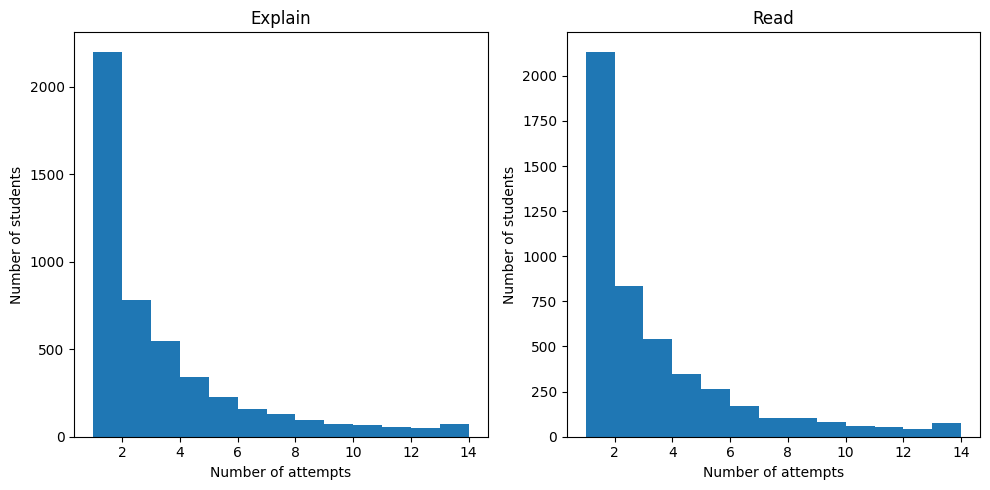

In [258]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
bins = np.arange(1, 15,1)
explain = df.query("variant == 'explain' and num_attempts<15").drop_duplicates(subset=["userId","exerciseName"])["num_attempts"]
explain.plot(kind='hist', ax=ax[0], title='Explain', bins=bins)
ax[0].set_xlabel("Number of attempts")
ax[0].set_ylabel("Number of students")
ax[0].set_title("Explain")
read = df.query("variant == 'reading'and num_attempts<15").drop_duplicates(subset=["userId","exerciseName"])["num_attempts"]
read.plot(kind='hist', ax=ax[1], title='Read', bins=bins)
ax[1].set_xlabel("Number of attempts")
ax[1].set_ylabel("Number of students")
ax[1].set_title("Read")
plt.tight_layout()
ttest = stats.ttest_ind(explain, read)
print(explain.mean(),read.mean(),ttest.pvalue)
print(explain.sum(),read.sum())


Merge Sort: 1.64,1.55,0.40
Insertion Sort: 1.76,1.84,0.44
Strassen’s Algorithm: 2.68,2.81,0.48
Maximum Sum Subarray: 2.60,2.87,0.20
Priority Queues: 2.69,3.02,0.11
Heap Sort: 3.02,2.69,0.14
Rod Cutting: 2.91,2.87,0.86
Matrix-Chain Multiplication: 1.76,1.89,0.37
Optimal Binary Search Trees: 2.84,2.69,0.47
Longest Common Subsequence: 2.88,2.94,0.77
Breadth-First Search: 2.85,3.18,0.12
Depth-First Search: 2.73,2.94,0.32
Topological Sorting: 2.21,2.21,0.99
Ford-Fulkerson Algorithm: 2.07,2.29,0.22
Edge disjoint paths via max flow: 2.42,2.51,0.66
Bipartite Matching via Max Flow: 3.27,3.22,0.86
Prim's Algorithm: 2.28,2.16,0.53
Kruskal's algorithm: 1.56,1.67,0.37
Dijkstra: 2.09,2.21,0.46
Bellman-Ford: 2.15,2.19,0.83
Quicksort: 2.78,2.67,0.62
Hash Tables: 3.35,3.27,0.78


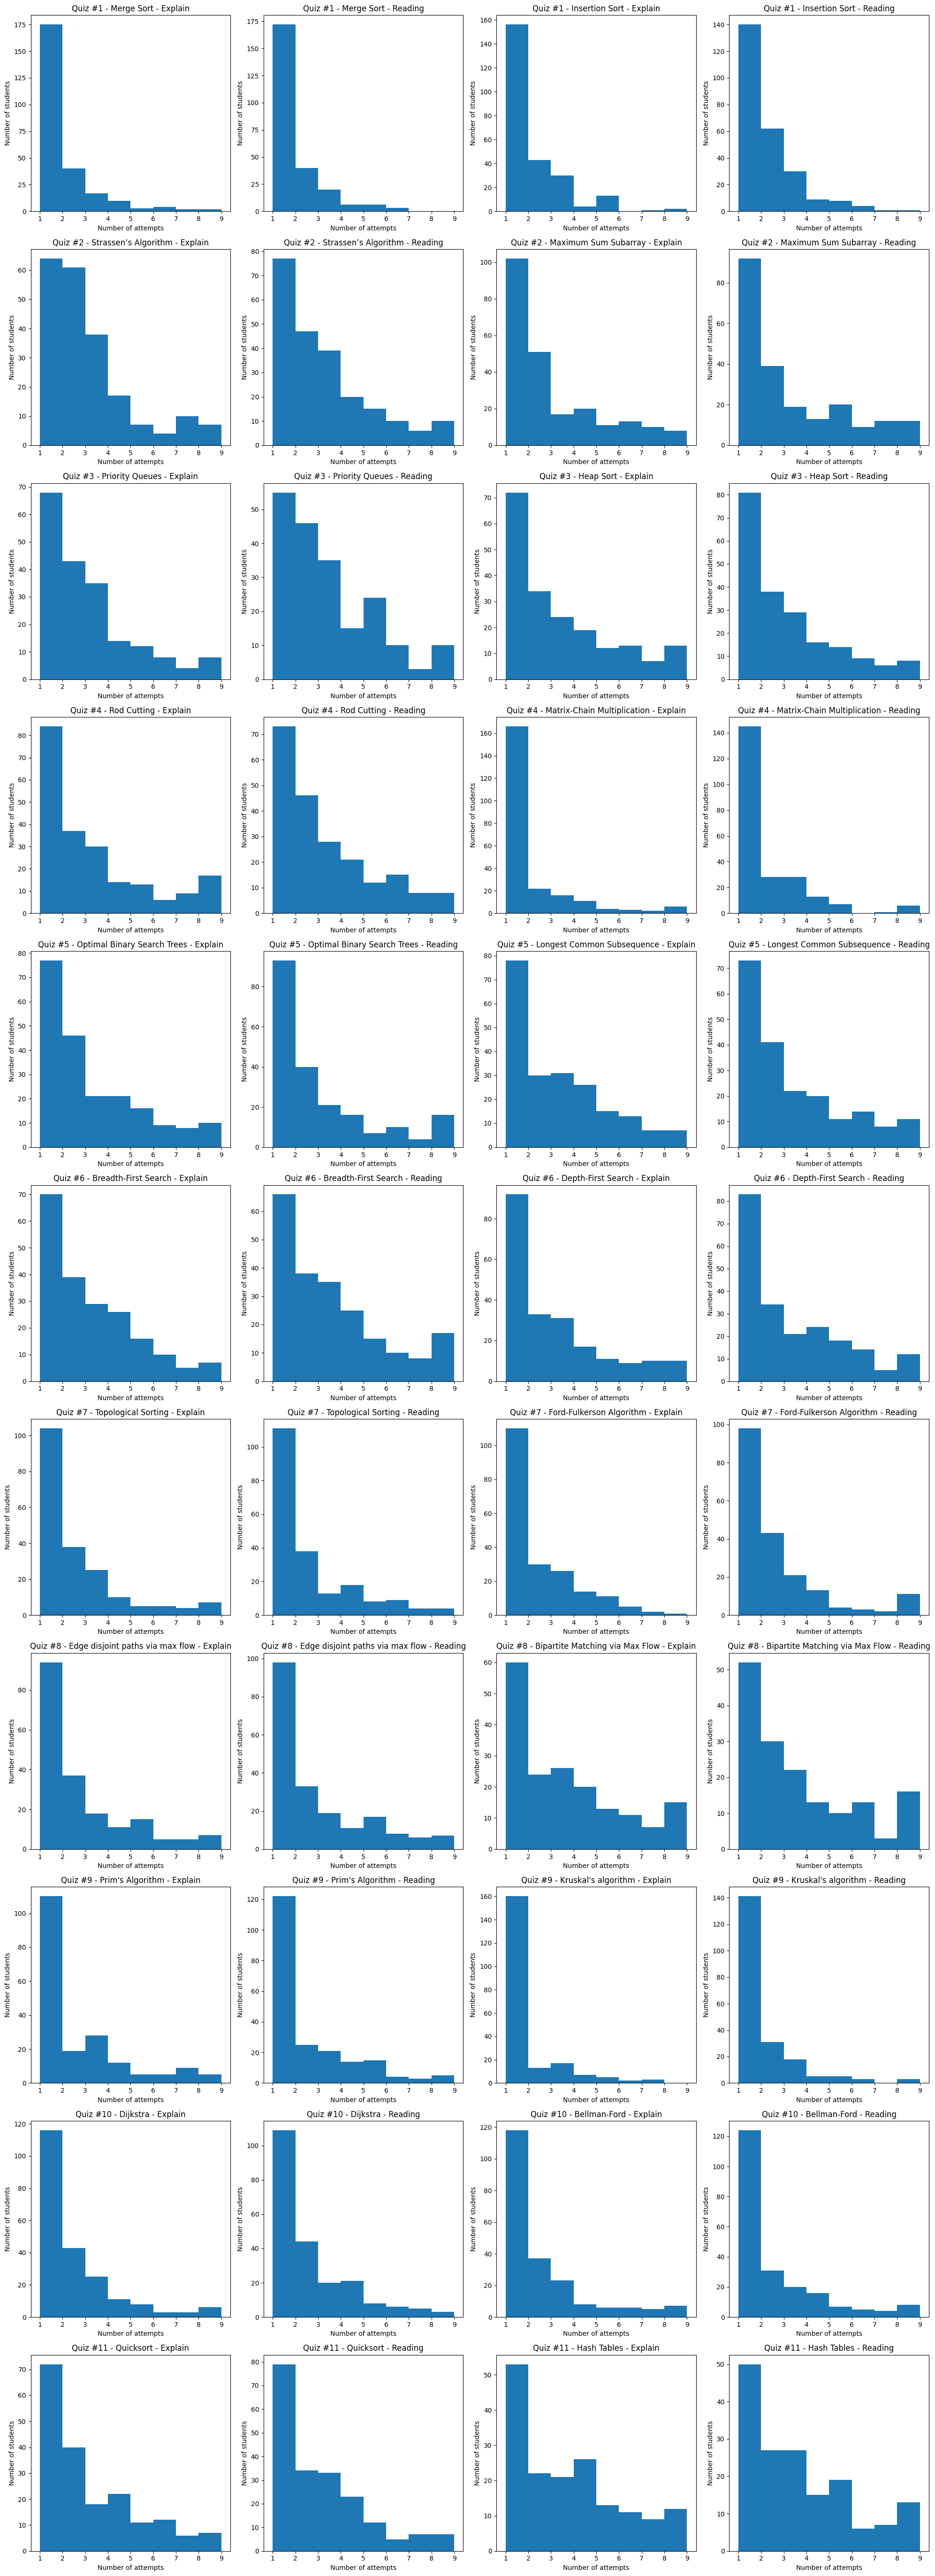

In [235]:
fig, ax = plt.subplots(len(weeks), 4, figsize=(20, 55))
bins = np.arange(1, 10,1)
for week in weeks :
    explain = df.query("variant == 'explain' and week == @week").dropna(subset="num_attempts").drop_duplicates(subset=['userId','exerciseId']).query("num_attempts <10")
    read = df.query("variant == 'reading' and week == @week").dropna(subset="num_attempts").drop_duplicates(subset=['userId','exerciseId']).query("num_attempts <10")
    exercise_list = list(explain["exerciseName"].unique())
    for ex in exercise_list:
        i1 = 2*exercise_list.index(ex)
        i2 = 1+2*exercise_list.index(ex)
        dfe = explain.query("exerciseName == @ex")["num_attempts"]
        dfe.plot(kind='hist', ax=ax[weeks.index(week),i1],bins=bins)
        ax[weeks.index(week),i1].set_xlabel("Number of attempts")
        ax[weeks.index(week),i1].set_ylabel("Number of students")
        ax[weeks.index(week),i1].set_title(f"{week} - {ex} - Explain")
        dfr = read.query("exerciseName == @ex")["num_attempts"]
        dfr.plot(kind='hist', ax=ax[weeks.index(week),i2],bins=bins)
        ax[weeks.index(week),i2].set_xlabel("Number of attempts")
        ax[weeks.index(week),i2].set_ylabel("Number of students")
        ax[weeks.index(week),i2].set_title(f"{week} - {ex} - Reading")
        ttest = stats.ttest_ind(dfe,dfr)
        if ttest.pvalue < 0.05:
            ax[weeks.index(week),i1].set_facecolor('lightgreen')
            ax[weeks.index(week),i2].set_facecolor('lightgreen')
        print(f"{ex}: {dfe.mean():.2f},{dfr.mean():.2f},{ttest.pvalue:.2f}")
plt.tight_layout()


## Number of Completed Exercises

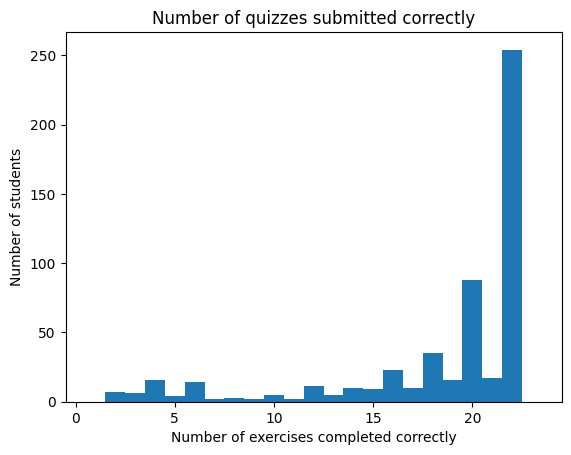

In [236]:
df[(df["type"]=="quizSubmission") & (df["details"].apply(lambda x: x.get("correctness")==1 if x is not None else False))]["userId"].value_counts().plot(kind='hist', bins=np.arange(1,25, 1))
plt.xticks(np.arange(1,25,5)-0.5, np.arange(0,25,5))
plt.xlabel("Number of exercises completed correctly")
plt.ylabel("Number of students")
plt.title("Number of quizzes submitted correctly")
plt.xlim(0,25)
plt.savefig('figures/attempts/number_of_quizzes.png')
plt.show()


# Quiz Time Analysis

count    8534.000000
mean        7.039012
std         6.381289
min         0.166689
25%         2.351210
50%         4.916414
75%         9.658395
max        29.923447
Name: timeSpent_quiz, dtype: float64


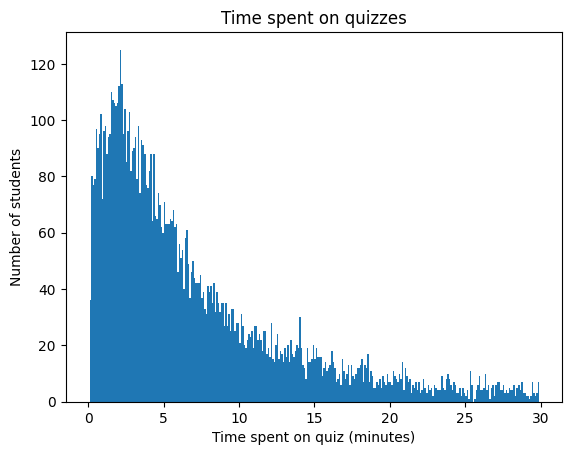

In [237]:
ts_df =df.drop_duplicates(subset=["userId", "exerciseName"]).query("@min_time<timeSpent_quiz<@max_time")
ts = ts_df["timeSpent_quiz"]
print(ts.describe())
ts.plot(kind='hist', bins=np.arange(0, 30, .1))
plt.xlabel("Time spent on quiz (minutes)")
plt.ylabel("Number of students")
plt.title("Time spent on quizzes")
plt.savefig('figures/quiz/time_spent.png')
plt.show()


## Explain vs Read

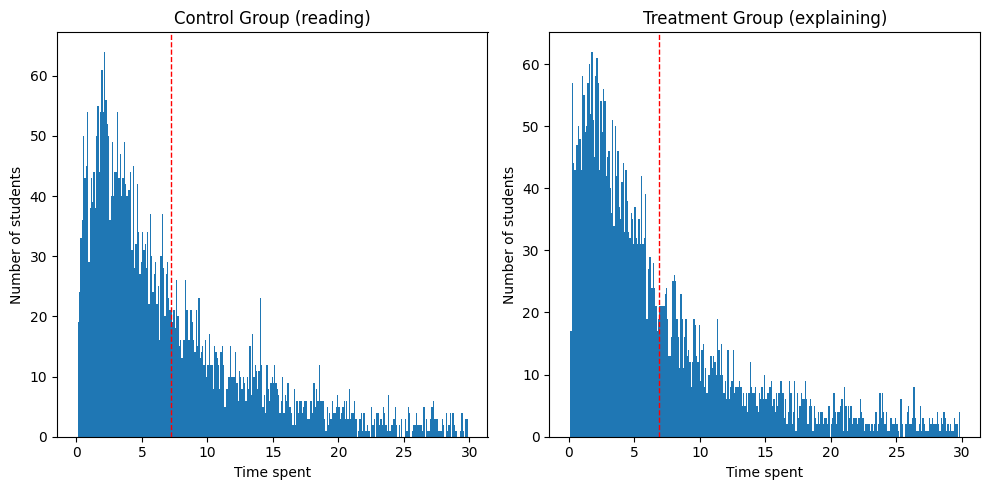

Reading group: 7.213558315155501
Explaining group: 6.86543532556776
TtestResult(statistic=2.520795310705946, pvalue=0.011727073459299487, df=8532.416059844205)


In [238]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
reading = df[df["variant"] == "reading"].query("@min_time<timeSpent_quiz<@max_time").drop_duplicates(subset=["userId", "exerciseName"])
explaining = df[df["variant"] == "explain"].query("@min_time<timeSpent_quiz<@max_time").drop_duplicates(subset=["userId", "exerciseName"])
bins = np.arange(0, max_time, 0.1)
reading["timeSpent_quiz"].plot(kind="hist", bins=bins, ax=axs[0])
explaining["timeSpent_quiz"].plot(kind="hist", bins=bins, ax=axs[1])
axs[0].set_title("Control Group (reading)")
axs[1].set_title("Treatment Group (explaining)")
axs[0].set_xlabel("Time spent")
axs[1].set_xlabel("Time spent")
axs[0].set_ylabel("Number of students")
axs[1].set_ylabel("Number of students")
#plot averages
axs[0].axvline(reading["timeSpent_quiz"].mean(), color='r', linestyle='dashed', linewidth=1)
axs[1].axvline(explaining["timeSpent_quiz"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.savefig('figures/quiz/time_spent_groups.png')
plt.show()
print("Reading group:", reading["timeSpent_quiz"].mean())
print("Explaining group:", explaining["timeSpent_quiz"].mean())
print(stats.ttest_ind(reading["timeSpent_quiz"],explaining["timeSpent_quiz"],equal_var=False))

## A vs B (Overall)

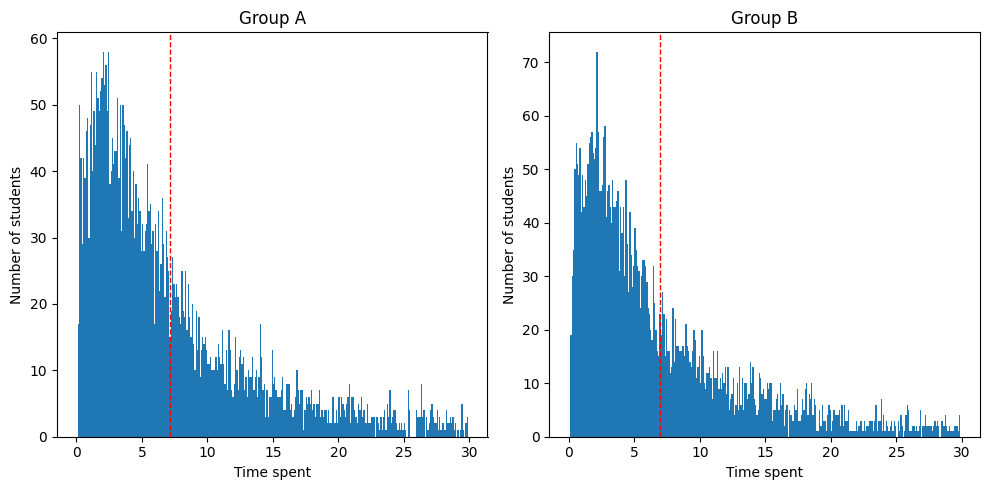

Group A: 7.146060797477084
Group B: 6.931258183348648
TtestResult(statistic=1.5549779598379416, pvalue=0.11998840897247648, df=8531.944278368883)


In [239]:
group_A = ts_df.query(" userGroup== 'A'")["timeSpent_quiz"]
group_B = ts_df.query(" userGroup== 'B'")["timeSpent_quiz"]
fig, axs = plt.subplots(1,2, figsize=(10, 5))
group_A.plot(kind="hist", bins=bins, ax=axs[0])
group_B.plot(kind="hist", bins=bins, ax=axs[1])
axs[0].set_title("Group A")
axs[1].set_title("Group B")
axs[0].set_xlabel("Time spent")
axs[1].set_xlabel("Time spent")
axs[0].set_ylabel("Number of students")
axs[1].set_ylabel("Number of students")
#plot averages
axs[0].axvline(group_A.mean(), color='r', linestyle='dashed', linewidth=1)
axs[1].axvline(group_B.mean(), color='r', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.savefig('figures/quiz/time_spent_groups.png')
plt.show()
print("Group A:", group_A.mean())
print("Group B:", group_B.mean())
print(stats.ttest_ind(group_A,group_B,equal_var=False))




## Explain vs Read (By Quiz)

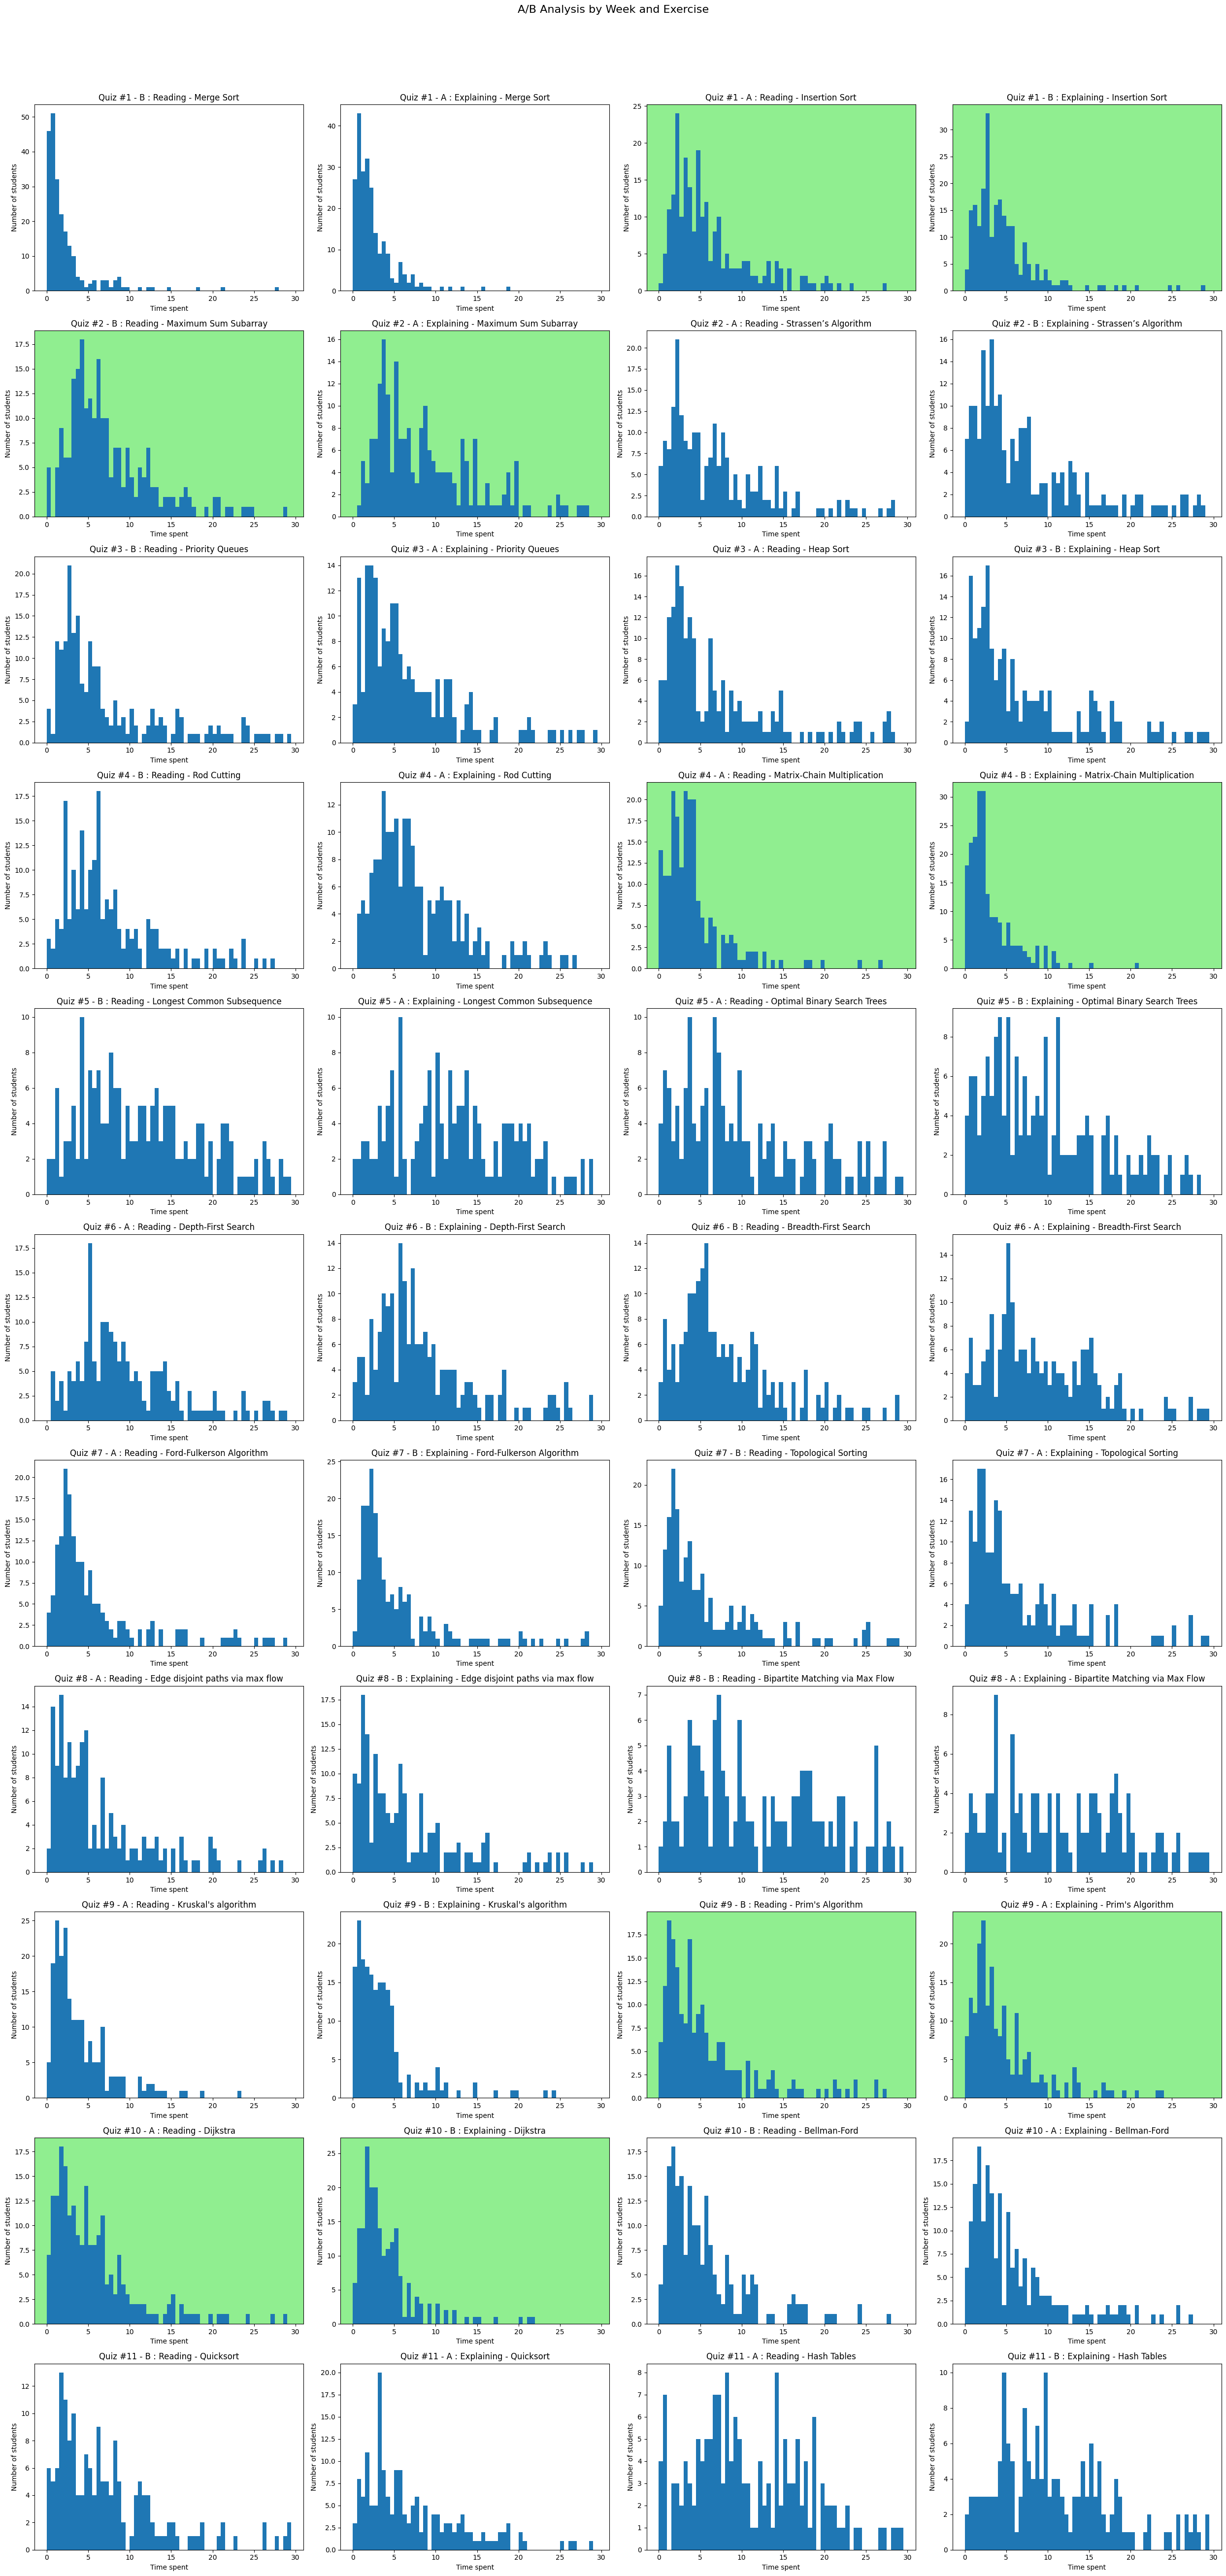

Quiz #1 - Merge Sort - Pvalue : 0.6196116605739992
----------------------------------------
Quiz #1 - Insertion Sort - Pvalue : 0.0006262811771204833
A
count    227.000000
mean       6.255187
std        4.966012
min        0.440454
25%        2.640491
50%        4.711275
75%        7.869434
max       27.289973
Name: timeSpent_quiz, dtype: float64
--------------------
B
count    233.000000
mean       4.772343
std        4.226629
min        0.292553
25%        2.198762
50%        3.760664
75%        5.778517
max       28.775657
Name: timeSpent_quiz, dtype: float64
----------------------------------------
Quiz #2 - Maximum Sum Subarray - Pvalue : 0.00973882165987707
A
count    230.000000
mean       7.473292
std        5.198152
min        0.186720
25%        3.970646
50%        6.152229
75%        9.829964
max       28.574451
Name: timeSpent_quiz, dtype: float64
--------------------
B
count    208.000000
mean       8.878616
std        6.038743
min        0.542337
25%        4.139409
50%   

In [240]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Initialize a figure with specified size
fig, axs = plt.subplots(11, 4, figsize=(25, 55))  # 11 rows, 4 columns
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing

stats_arr = []
# Flatten the axes array for easy indexing
axs = axs.flatten()

plot_index = 0  # To track the subplot index
for week in weeks:
    group_a = df[(df["userGroup"] == "A") & (df["week"] == week)].drop_duplicates(subset=["userId", "exerciseName"]).query(time_query("timeSpent_quiz")).dropna(subset=["timeSpent_quiz"])
    group_b = df[(df["userGroup"] == "B") & (df["week"] == week)].drop_duplicates(subset=["userId", "exerciseName"]).query(time_query("timeSpent_quiz")).dropna(subset=["timeSpent_quiz"])
    exercise_list = group_a["exerciseName"].unique()
    
    for exo in exercise_list:
        bins = np.arange(0, 30, 0.5)
        cg = group_a[group_a["exerciseName"] == exo]["controlGroup"].values[0]
        
        if cg == "A":
            index = 0
            axs[plot_index].set_title(f"{week} - A : Reading - {exo}")
            axs[plot_index + 1].set_title(f"{week} - B : Explaining - {exo}")
        else:
            index = 1
            axs[plot_index + 1].set_title(f"{week} - A : Explaining - {exo}")
            axs[plot_index].set_title(f"{week} - B : Reading - {exo}")
        
        # Plot histograms for both groups
        group_a[group_a["exerciseName"] == exo]["timeSpent_quiz"].plot(kind="hist", bins=bins, ax=axs[plot_index])
        group_b[group_b["exerciseName"] == exo]["timeSpent_quiz"].plot(kind="hist", bins=bins, ax=axs[plot_index + 1])
        
        # Set axis labels
        axs[plot_index].set_xlabel("Time spent")
        axs[plot_index + 1].set_xlabel("Time spent")
        axs[plot_index].set_ylabel("Number of students")
        axs[plot_index + 1].set_ylabel("Number of students")
        
        # Perform t-test
        ttest = stats.ttest_ind(group_a[group_a["exerciseName"] == exo]["timeSpent_quiz"], group_b[group_b["exerciseName"] == exo]["timeSpent_quiz"], equal_var=False)
        stats_arr.append(f"{week} - {exo} - Pvalue : {ttest.pvalue}")
        
        if ttest.pvalue < 0.05:
            axs[plot_index].set_facecolor('lightgreen')
            axs[plot_index + 1].set_facecolor('lightgreen')
            s = "A\n" + str(group_a[group_a["exerciseName"] == exo]["timeSpent_quiz"].describe()) + "\n" + "-"*20 + "\n"
            s += "B\n" + str(group_b[group_b["exerciseName"] == exo]["timeSpent_quiz"].describe())
            stats_arr.append(s)
        
        stats_arr.append("-"*40)
        plot_index += 2  # Move to the next pair of subplots
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("A/B Analysis by Week and Exercise", fontsize=16)
plt.savefig('figures/quiz/time_spent_groups_week.png')
plt.show()


# Print stats
for line in stats_arr:
    print(line)

# Message Time Analysis

## Number of Messages

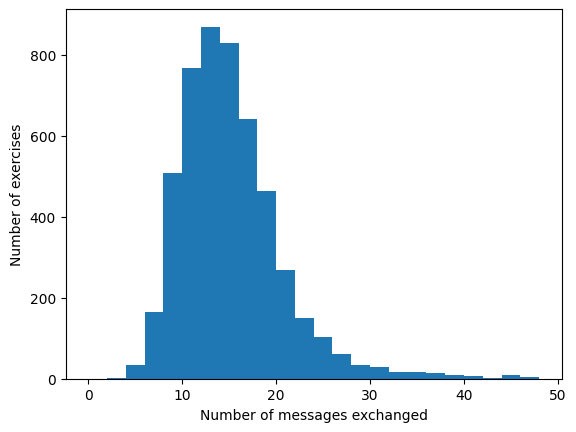

count    5005.000000
mean       15.182418
std         5.558397
min         3.000000
25%        11.000000
50%        15.000000
75%        17.000000
max        49.000000
Name: n_mess, dtype: float64


In [241]:
mess_df = df.drop_duplicates(subset=["userId","exerciseId"]).query("n_mess <50")
mess_df["n_mess"].plot(kind='hist', bins=np.arange(0, 50, 2))
plt.xlabel("Number of messages exchanged")
plt.ylabel("Number of exercises")
plt.savefig('figures/messages/n_mess.png')
plt.show() 
print(mess_df["n_mess"].describe())


### A vs B (Overall)

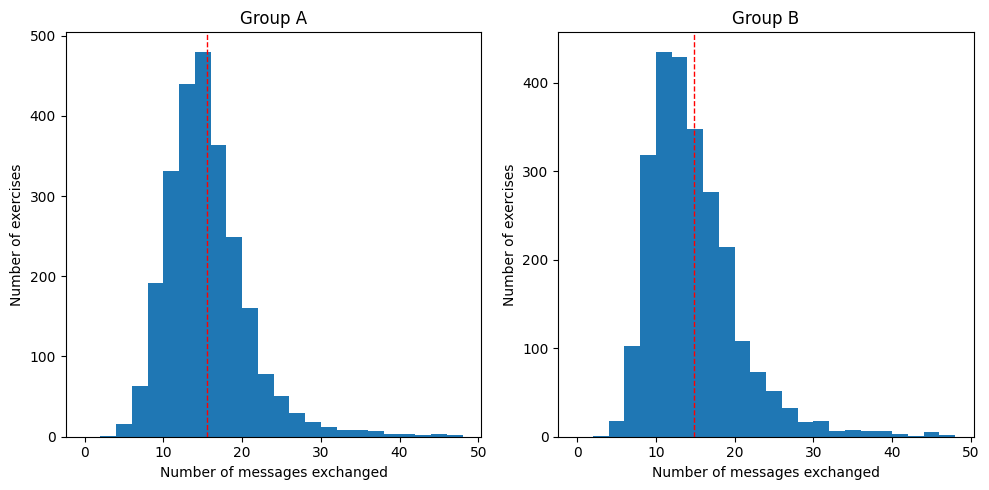

Group A: 15.56163297661514
Group B: 14.796937953263496
TtestResult(statistic=4.873818415354852, pvalue=1.1288199210139481e-06, df=4949.033218348939)


In [242]:
group_A = mess_df.query(" userGroup== 'A'")["n_mess"]
group_B = mess_df.query(" userGroup== 'B'")["n_mess"]
fig, axs = plt.subplots(1,2, figsize=(10, 5))
group_A.plot(kind="hist", bins=np.arange(0,50, 2), ax=axs[0])
group_B.plot(kind="hist", bins=np.arange(0,50, 2), ax=axs[1])
axs[0].set_title("Group A")
axs[1].set_title("Group B")
axs[0].set_xlabel("Number of messages exchanged")
axs[1].set_xlabel("Number of messages exchanged")
axs[0].set_ylabel("Number of exercises")
axs[1].set_ylabel("Number of exercises")
#plot averages
axs[0].axvline(group_A.mean(), color='r', linestyle='dashed', linewidth=1)
axs[1].axvline(group_B.mean(), color='r', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.savefig('figures/messages/n_mess_groups.png')
plt.show()
print("Group A:", group_A.mean())
print("Group B:", group_B.mean())
print(stats.ttest_ind(group_A,group_B,equal_var=False))


### A vs B (By Week)

Quiz #1 - Pvalue : 0.004106702277875488
Group A
16.31578947368421
Group B
14.746938775510204
----------------------------------------
Quiz #2 - Pvalue : 3.698286049184304e-17
Group A
14.713709677419354
Group B
11.600858369098713
----------------------------------------
Quiz #3 - Pvalue : 5.855650541558099e-20
Group A
15.806034482758621
Group B
11.730434782608695
----------------------------------------
Quiz #4 - Pvalue : 0.6386144286979079
----------------------------------------
Quiz #5 - Pvalue : 0.06768603933599063
----------------------------------------
Quiz #6 - Pvalue : 0.7311823459033651
----------------------------------------
Quiz #7 - Pvalue : 0.00660834888144471
Group A
14.830985915492958
Group B
16.156398104265403
----------------------------------------
Quiz #8 - Pvalue : 0.2701026907960373
----------------------------------------
Quiz #9 - Pvalue : 0.6141196972822185
----------------------------------------
Quiz #10 - Pvalue : 0.0013684911090848359
Group A
14.10666666666

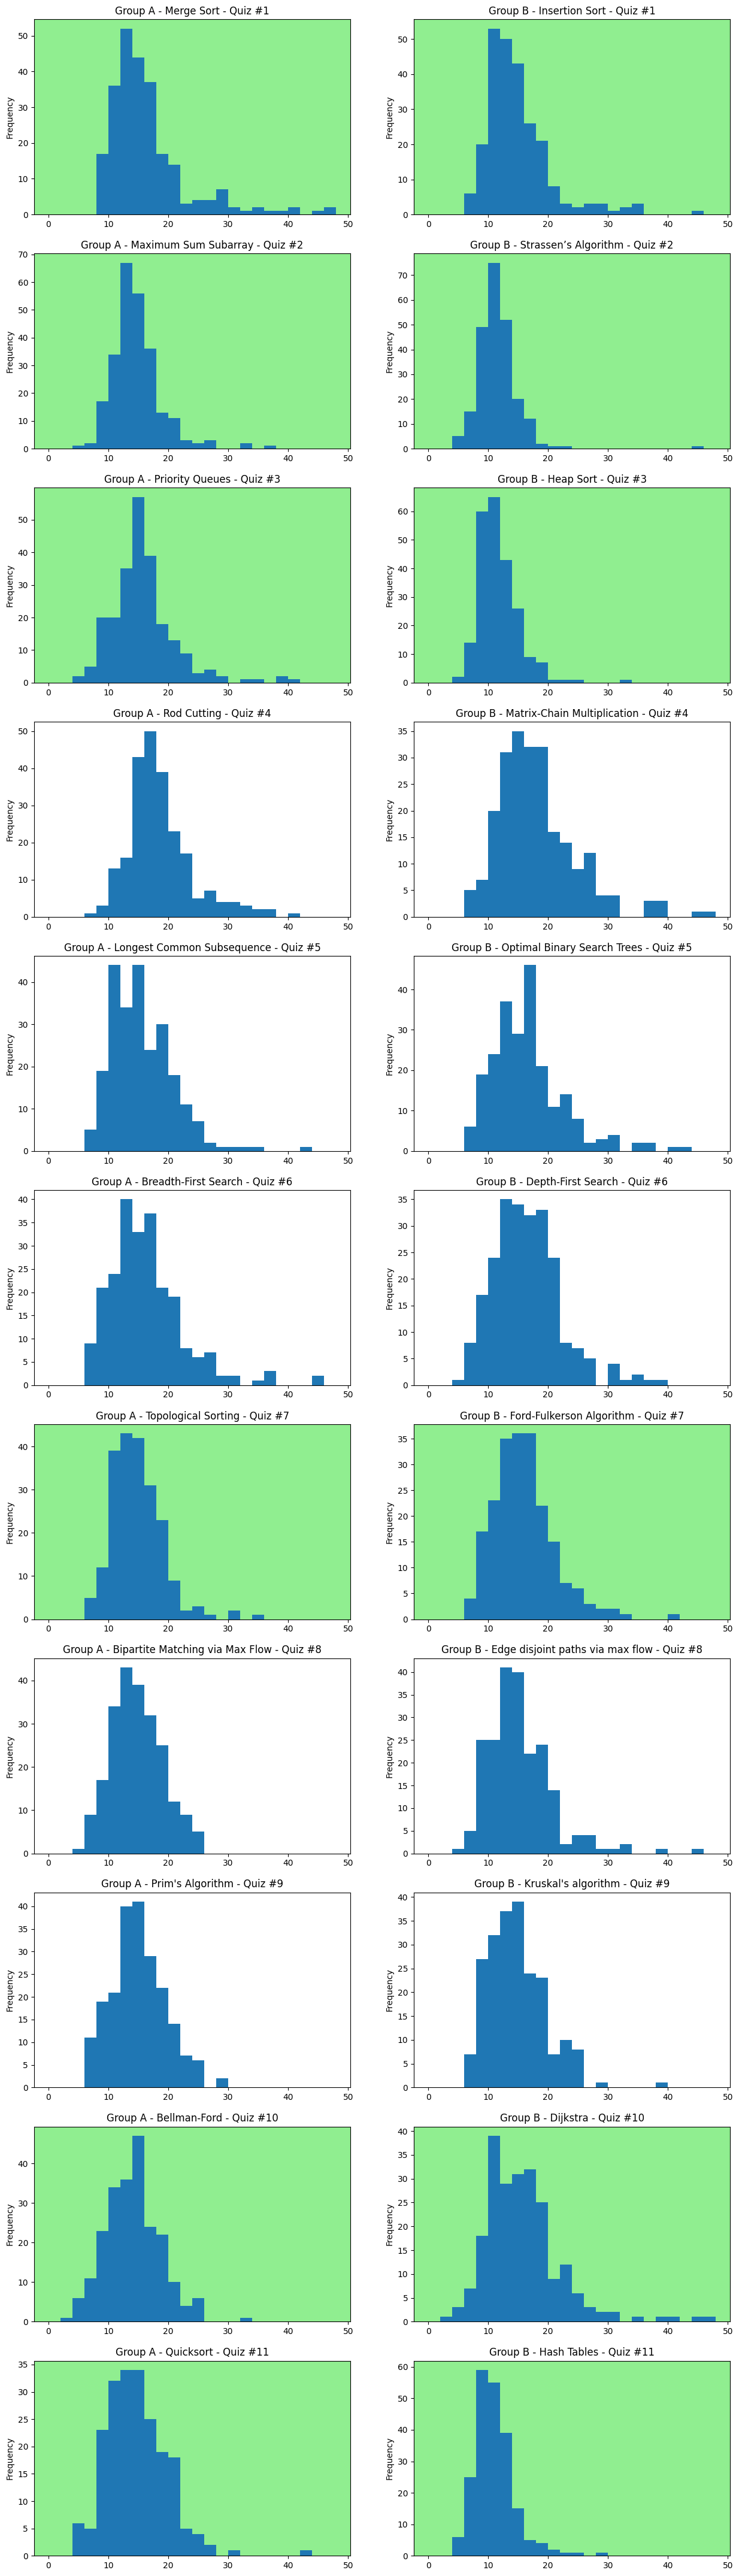

In [243]:
#number of message per week
fig, axs = plt.subplots(len(weeks),2, figsize=(15, 55))
for i,week in enumerate(weeks):
    group_a = mess_df[(mess_df["userGroup"] == "A") & (mess_df["week"] == week)]
    group_b = mess_df[(mess_df["userGroup"] == "B") & (mess_df["week"] == week)]
    bins = np.arange(0, 50, 2)
    group_a["n_mess"].plot(kind="hist", bins=bins, ax=axs[i,0])
    group_b["n_mess"].plot(kind="hist", bins=bins, ax=axs[i,1])
    axs[i,0].set_title("Group A - "+group_a["exerciseName"].values[0]+" - "+week)
    axs[i,1].set_title("Group B - "+group_b["exerciseName"].values[0]+" - "+week)
    # plt.suptitle(week)    
    ttest = stats.ttest_ind(group_a["n_mess"], group_b["n_mess"], equal_var=False)
    print(f"{week} - Pvalue : {ttest.pvalue}")
    if ttest.pvalue < 0.05:
        print("Group A")
        print(group_a["n_mess"].mean())
        print("Group B")
        print(group_b["n_mess"].mean())
        axs[i,0].set_facecolor('lightgreen')
        axs[i,1].set_facecolor('lightgreen')
        # # show mean
        # axs[i,0].axvline(group_a["n_mess"].mean(), color='r', linestyle='dashed', linewidth=1)
        # axs[i,1].axvline(group_b["n_mess"].mean(), color='r', linestyle='dashed', linewidth=1)
    print("-"*40)
plt.savefig('figures/messages/n_mess_groups_week.png')
plt.show()


## Time Spent on Messages

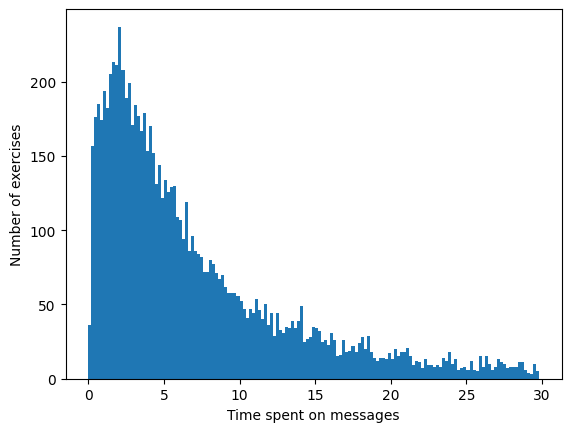

count    8534.000000
mean        7.039012
std         6.381289
min         0.166689
25%         2.351210
50%         4.916414
75%         9.658395
max        29.923447
Name: timeSpent_message, dtype: float64


In [244]:

tsm = df.drop_duplicates(subset=["userId","exerciseId"]).query(str(time_query("timeSpent_message",max=30)))
tsm["timeSpent_message"].plot(kind='hist', bins=np.arange(0, 30, .20))
plt.xlabel("Time spent on messages")
plt.ylabel("Number of exercises")
plt.savefig('figures/messages/time_spent.png')
plt.show()
print(tsm["timeSpent_message"].describe())


### A vs B (Overall)

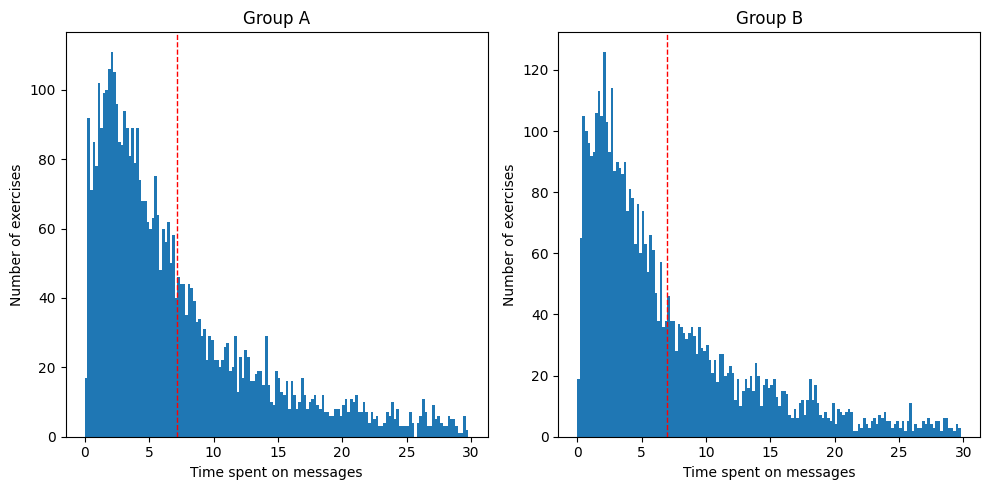

Group A: 7.146060797477084
Group B: 6.931258183348648
TtestResult(statistic=1.5549779598379416, pvalue=0.11998840897247648, df=8531.944278368883)


In [245]:
group_A = tsm.query("userGroup == 'A'")
group_B = tsm.query("userGroup == 'B'")
fig, axs = plt.subplots(1,2, figsize=(10, 5))
group_A["timeSpent_message"].plot(kind="hist", bins=np.arange(0,30, .2), ax=axs[0])
group_B["timeSpent_message"].plot(kind="hist", bins=np.arange(0,30, .2), ax=axs[1])
axs[0].set_title("Group A")
axs[1].set_title("Group B")
axs[0].set_xlabel("Time spent on messages")
axs[1].set_xlabel("Time spent on messages")
axs[0].set_ylabel("Number of exercises")
axs[1].set_ylabel("Number of exercises")
#plot averages
axs[0].axvline(group_A["timeSpent_message"].mean(), color='r', linestyle='dashed', linewidth=1)
axs[1].axvline(group_B["timeSpent_message"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.savefig('figures/messages/time_spent_groups.png')
plt.show()
print("Group A:", group_A["timeSpent_message"].mean())
print("Group B:", group_B["timeSpent_message"].mean())
print(stats.ttest_ind(group_A["timeSpent_message"],group_B["timeSpent_message"],equal_var=False))


## A vs B (By Week)

Quiz #1 - Pvalue : 0.24549303127146932
----------------------------------------
Quiz #2 - Pvalue : 0.47136790649774374
----------------------------------------
Quiz #3 - Pvalue : 0.7841839944181436
----------------------------------------
Quiz #4 - Pvalue : 2.2175160451166555e-17
Group A
18.736040609137056
Group B
18.559808612440193
----------------------------------------
Quiz #5 - Pvalue : 0.02731582862934262
Group A
15.785340314136125
Group B
16.563218390804597
----------------------------------------
Quiz #6 - Pvalue : 0.4896838336970727
----------------------------------------
Quiz #7 - Pvalue : 0.4619739017218716
----------------------------------------
Quiz #8 - Pvalue : 0.0003978890152997829
Group A
15.114285714285714
Group B
15.4
----------------------------------------
Quiz #9 - Pvalue : 0.0007313655445854161
Group A
15.090452261306533
Group B
14.912371134020619
----------------------------------------
Quiz #10 - Pvalue : 3.3101474329825082e-06
Group A
14.163366336633663
Grou

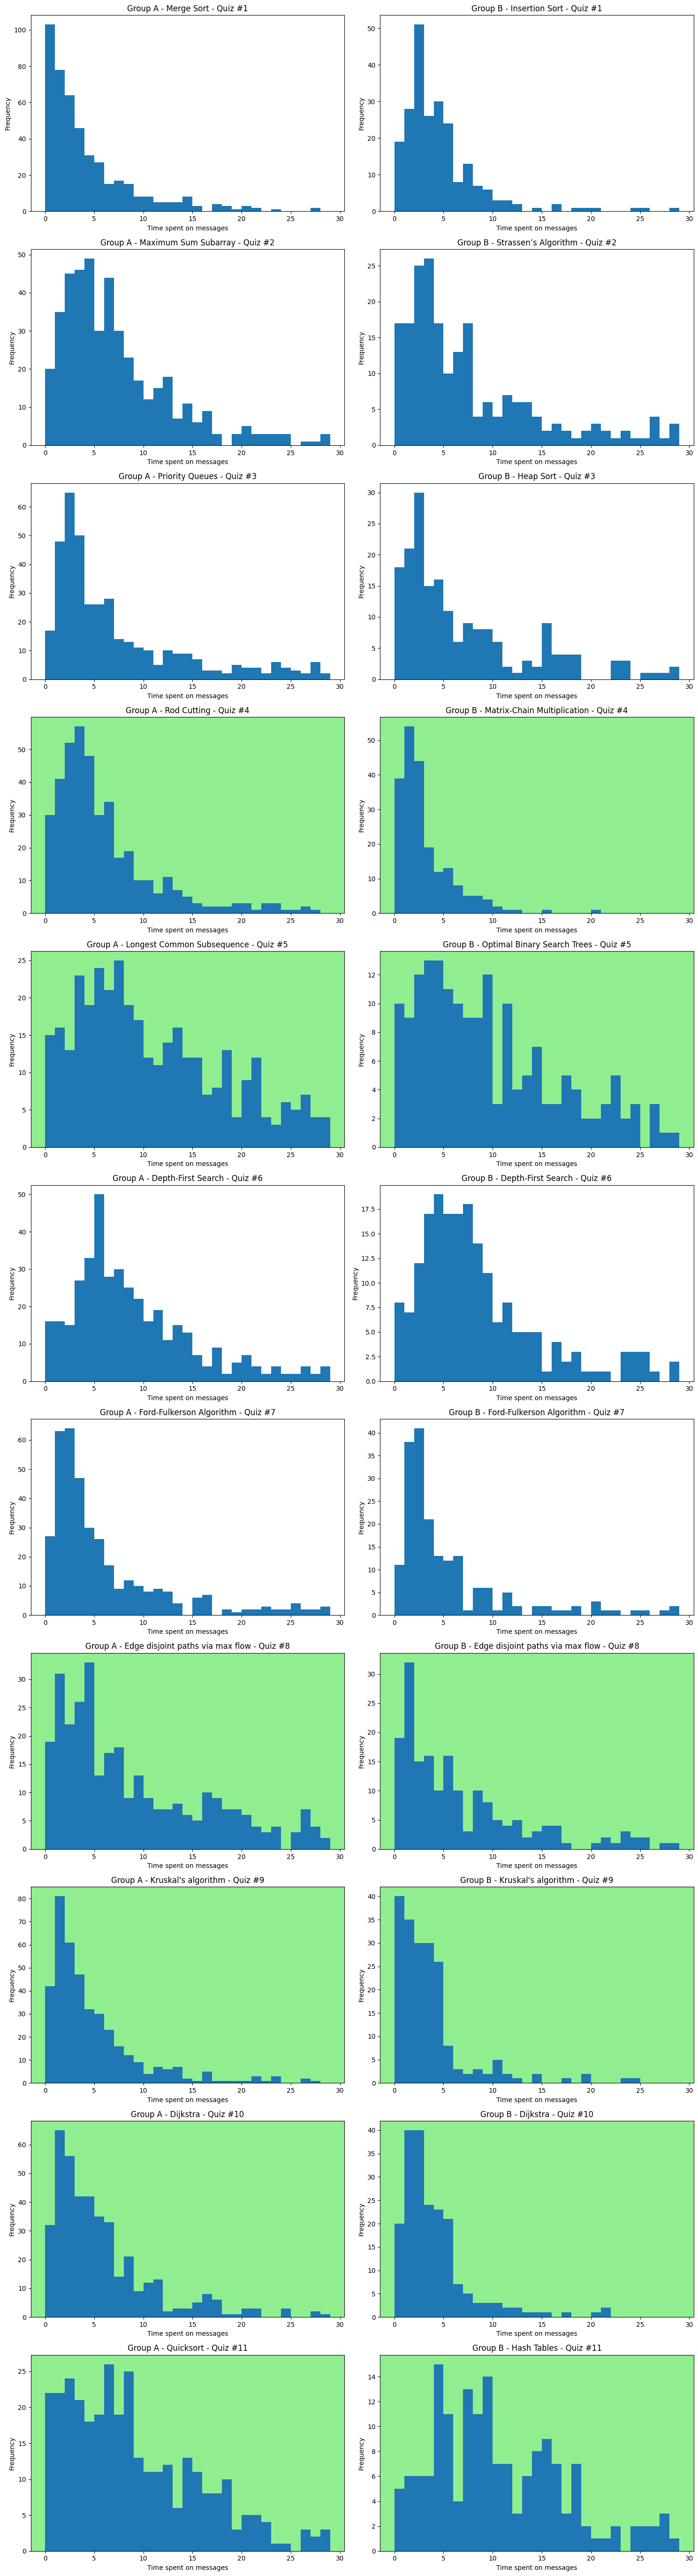

In [246]:
#number of message per week
fig, axs = plt.subplots(len(weeks),2, figsize=(15, 55))
for i,week in enumerate(weeks):
    group_a = tsm[(tsm["userGroup"] == "A") & (tsm["week"] == week)]
    group_b = tsm[(mess_df["userGroup"] == "B") & (tsm["week"] == week)]
    bins = np.arange(0, 30, 1)
    group_a["timeSpent_message"].plot(kind="hist", bins=bins, ax=axs[i,0])
    group_b["timeSpent_message"].plot(kind="hist", bins=bins, ax=axs[i,1])
    axs[i,0].set_title("Group A - "+group_a["exerciseName"].values[0]+" - "+week)
    axs[i,1].set_title("Group B - "+group_b["exerciseName"].values[0]+" - "+week)
    axs[i,0].set_xlabel("Time spent on messages")
    axs[i,1].set_xlabel("Time spent on messages")
    # plt.suptitle(week)    
    ttest = stats.ttest_ind(group_a["timeSpent_message"], group_b["timeSpent_message"], equal_var=False)
    print(f"{week} - Pvalue : {ttest.pvalue}")
    if ttest.pvalue < 0.05:
        print("Group A")
        print(group_a["n_mess"].mean())
        print("Group B")
        print(group_b["n_mess"].mean())
        axs[i,0].set_facecolor('lightgreen')
        axs[i,1].set_facecolor('lightgreen')
        # # show mean
        # axs[i,0].axvline(group_a["n_mess"].mean(), color='r', linestyle='dashed', linewidth=1)
        # axs[i,1].axvline(group_b["n_mess"].mean(), color='r', linestyle='dashed', linewidth=1)
    print("-"*40)
plt.savefig('figures/messages/timeSpent_message_groups_week.png')
plt.tight_layout()
plt.show()


# Message / Quiz Time Analysis

In [247]:
mq = df.drop_duplicates(subset=["userId","exerciseId"]).query("variant == 'explain'").query(
    time_query("timeSpent_message")).query(time_query("timeSpent_quiz"))
mq[["timeSpent_quiz","timeSpent_message"]].describe()

,timeSpent_quiz,timeSpent_message
count,4299.000000,4299.000000
mean,6.865435,6.865435
std,6.399862,6.399862
min,0.166696,0.166696
25%,2.249275,2.249275
50%,4.749411,4.749411
75%,9.283462,9.283462
max,29.923447,29.923447


In [248]:
print(mq[["timeSpent_quiz","timeSpent_message"]].corr())

                   timeSpent_quiz  timeSpent_message
timeSpent_quiz                1.0                1.0
timeSpent_message             1.0                1.0


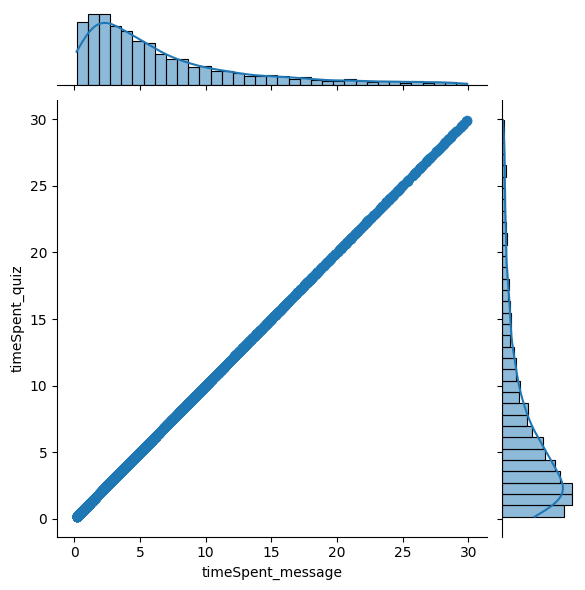

In [249]:
sns.jointplot(data=mq, y="timeSpent_quiz", x="timeSpent_message", kind="reg")

In [250]:
bins = np.arange(0, 35, 5)
mq["bin_avg"] = pd.cut(mq["timeSpent_message"], bins=bins)
display(mq)
display(mq.groupby("bin_avg")["timeSpent_quiz"].mean())

,_creationTime,_id,attemptId,exerciseId,type,userId,variant,details,systemMessageId,userMessageId,...,userGroup,week,timeSpent_quiz,n_mess,timeSpent_message,userData,userGrades,valid,num_attempts,bin_avg
1,2024-04-16 08:00:01.116,k57000a4rv5wgy13d63pqyt51s6qb2vv,j57adjsev6qjazakv9p4ad7qwh6qany3,k1710bmgh2mwgaqv7sjkmmfh1x6pveqf,quizSubmission,js7ese808vctnr15sy1te2pvx96mndmx,explain,"{'answers': [2.0, 0.0, 2.0], 'correctness': 1....",None,None,...,B,Quiz #5,18.036219,11.0,18.036219,"{'gender': 'Male', 'section': 'SC', 'semester'...","{'coding': 100.0, 'midterm': 63, 'final': 72, ...",True,9.0,"(15, 20]"
4,2024-03-13 16:35:30.072,k57000mdpmrfm67q4eymvsbqns6n6ezf,j571e3e401tqj2mag6mjgrcynx6n7t96,k1715d99fyvzt35jfm2638g3nd6n35z3,exerciseCompleted,js7534h7gnm8pmyem0n6ttdb816mb94w,explain,None,None,None,...,B,Quiz #3,9.432901,9.0,9.432901,"{'gender': 'Male', 'section': 'SC', 'semester'...","{'coding': 100.0, 'midterm': 87, 'final': 68, ...",True,NaN,"(5, 10]"
7,2024-05-22 09:03:11.012,k57000tdp2bnpcsszr3m7nyr316sjeg0,j577f039a412vmwetm03yv6np16sj2t3,k17416m11n2qpqy5sr2zz6782s6s2y2n,attemptStarted,js770gtc71hjt59gn0n6xmx9an6mb4tq,explain,None,None,None,...,A,Quiz #11,1.764233,31.0,1.764233,"{'gender': 'Male', 'section': 'MA', 'semester'...","{'coding': 100.0, 'midterm': 78, 'final': 92, ...",True,NaN,"(0, 5]"
9,2024-04-04 13:43:46.323,k57000x8jdvr4gjsm2p0ey1bms6pj2vt,j57en6wxxqtd4x169vt90y9zdh6pkyh4,k1779x2fet2p0zkazg66nvfcjh6p2vbm,messageSent,js73xpgsqcv0gmv0g1w7as97rd6me4c0,explain,None,jd747sa89e37hf86z054b67wjx6pk19t,jd7b6sqaqbmgvxc1b14sr4rewn6pj0sj,...,A,Quiz #4,5.145569,17.0,5.145569,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 85.0, 'midterm': 90, 'final': 79, '...",True,NaN,"(5, 10]"
10,2024-04-07 10:08:21.862,k5700154f6etndhepqx0rstrkn6pr0xk,j573anryyjzgxm9rcpdm6t9bys6psp8s,k17asvnfeyp3q949hdkwjq2and6p2x6e,messageSent,js74xtqm1gax5zqzszz0yrnfss6mekyy,explain,None,jd75ge56tp37t39fp4pw04mmcx6ps3s9,jd71yw479qb2cp2xv2k5b7z1n16psack,...,B,Quiz #4,1.805898,17.0,1.805898,"{'gender': 'Male', 'section': 'IN', 'semester'...","{'coding': 100.0, 'midterm': 47, 'final': 69, ...",True,NaN,"(0, 5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49480,2024-04-29 18:30:40.921,k5754r556yjtspmneg7xds0tcn6r5g4p,j57avxg46jt4ajb89tmhjf4qyx6r43cd,k172p4g9eanfgsgtkjg0sn49916qgwh4,messageSent,js7e51vb9ax0tjrrnkj5kdzya16mkc3w,explain,None,jd7f8fp08gxkw9307jr91w1e3s6r56vy,jd7073sgqck9xf3jk0rj1wb9h96r5v0a,...,A,Quiz #7,25.391396,13.0,25.391396,None,None,False,NaN,"(25, 30]"
54219,2024-04-22 12:00:41.164,k575n08ywqcbr1j6jxkjh4b2z16qpzgx,j570q1k98yqbd9qrnahtavecvd6qqw0b,k171kqa60g6a9qpm0f0jv07wn16ptnr1,answerGenerated,js7f8kdtkjrmqxxvz26gsykw7h6mbzmv,explain,None,jd7a9mwzy15sf7x21m9ey21vcx6qq2pa,jd75ggwf9a271543r77ysnxb856qpsyr,...,A,Quiz #6,12.561016,15.0,12.561016,"{'gender': 'Male', 'section': 'SC', 'semester'...","{'coding': 100.0, 'midterm': 58, 'final': 72, ...",True,NaN,"(10, 15]"
54415,2024-03-03 11:39:03.601,k575nkvhc5ft6f8qyndm1dhcg16mkg5r,j5743hjj2tqnjdjm1y2cmb56ns6mjmzc,k17986at882ejjew66z1bgx5w96m67y2,messageSent,js71447h2zs7hrb550b5efh2j56mkphj,explain,None,jd779kf518k150b3mb1dpagyd96mkd6d,jd74ykm8wnqp58425y8k2k1m5x6mj554,...,B,Quiz #1,3.868732,13.0,3.868732,None,None,False,NaN,"(0, 5]"
66900,2024-04-30 06:54:36.791,k576z6vrr04vd8xxs3pmdj9g196r65pd,j57fbjqnpxbcdrhcmg6nt6kj8n6r68r0,k172p4g9eanfgsgtkjg0sn49916qgwh4,answerGenerated,js78dt975n0t5hzyfw9favxna56mdqf8,explain,None,jd718nge4ngkcqhjnha8jaadks6r64ms,jd72npbd22g97yq16jhn2kczbx6r7cjh,...,A,Quiz #7,15.274994,7.0,15.274994,None,None,False,NaN,"(15, 20]"


bin_avg
(0, 5]       2.419687
(5, 10]      7.080825
(10, 15]    12.214303
(15, 20]    17.117125
(20, 25]    22.283456
(25, 30]    27.388785
Name: timeSpent_quiz, dtype: float64

## Grade Analysis

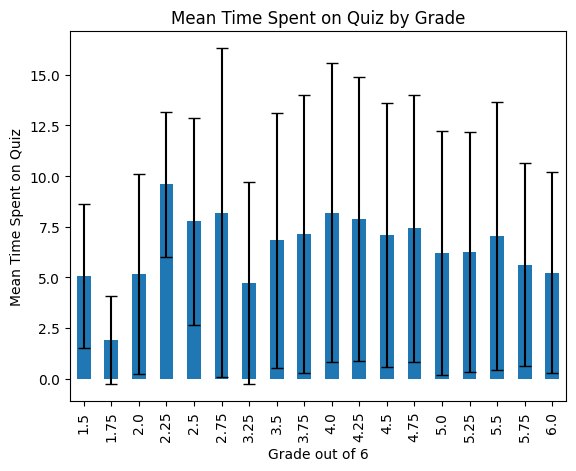

In [251]:
# Calculate mean and standard deviation
mean_time_spent = mq.groupby(mq["userGrades"].dropna().apply(lambda x: x.get("grade_out_of_6")))["timeSpent_quiz"].mean()
std_time_spent = mq.groupby(mq["userGrades"].dropna().apply(lambda x: x.get("grade_out_of_6")))["timeSpent_quiz"].std()

# Plot with error bars
mean_time_spent.plot(kind='bar', yerr=std_time_spent, capsize=4)
plt.xlabel('Grade out of 6')
plt.ylabel('Mean Time Spent on Quiz')
plt.title('Mean Time Spent on Quiz by Grade')
plt.show()